In [1]:
# NagBody :: Numerical Algorithms for General Body Dynamics and data analysis

#MathematicaMCMC code

#Author:
#Mario A. Rodríguez-Meza
#Instituto Nacional de Investigaciones Nucleares
#marioalberto.rodriguez@inin.gob.mx
#Ciudad de México. January 1st, 2019
#Updated: 2020-11-5


In [2]:
from __future__ import print_function
#Show plots inline, and load main getdist plot module and samples class
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
import numpy as np
from getdist import plots, MCSamples, chains
import getdist, IPython
print('Version: ',getdist.__version__)
# use this *after* importing getdist if you want to use interactive plots
# %matplotlib notebook
import matplotlib.pyplot as plt
import IPython
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))
# matplotlib 2 may not work very well without usetex on, can uncomment
# plt.rcParams['text.usetex']=True

Version:  1.1.2
GetDist Version: 1.1.2, Matplotlib version: 3.1.3


In [3]:
# Configure according to your needs
download_dir = "./Results/getdist_analysis/"
confidenceL_dir="confidenceRegions/"
posteriors_dir="posteriors/"
chainsDir="./Results/Chains/"
fileStr="IC2574_PISO"
chainLoadSample=chainsDir+fileStr+"-MCExt"


In [4]:
#Load from file
from getdist import loadMCSamples, chains, MCSamples

# Load individual samples:
#samples = loadMCSamples(chainLoadSample, settings={'ignore_rows':0.3})
# It was already burned
samples = loadMCSamples(chainLoadSample)


In [5]:
# PDF files of the posteriors:
posteriors = download_dir+posteriors_dir+fileStr+"_histograms.pdf"


In [6]:
# PDF files of the confidence regions files:
confidenceL = download_dir+confidenceL_dir+fileStr+"_confidence.pdf"


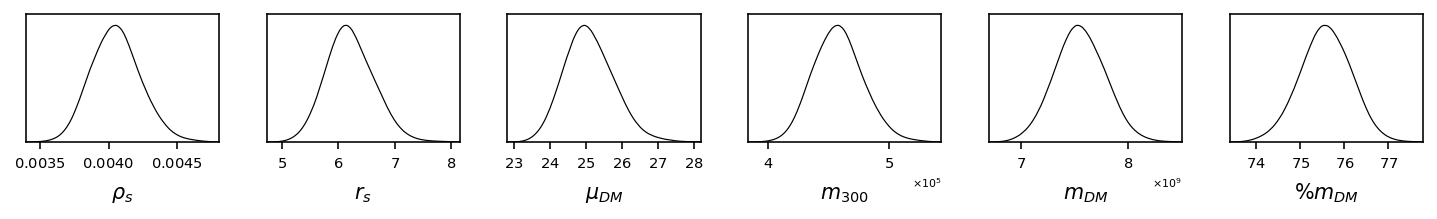

In [7]:
# Multiple 1D subplots

g = plots.get_subplot_plotter(width_inch=10)

# Plot and save to a file:
g.plots_1d(samples, ['p1', 'p2', 'p3', 'p4','p5','p6'], nx=6);
g.export(posteriors)


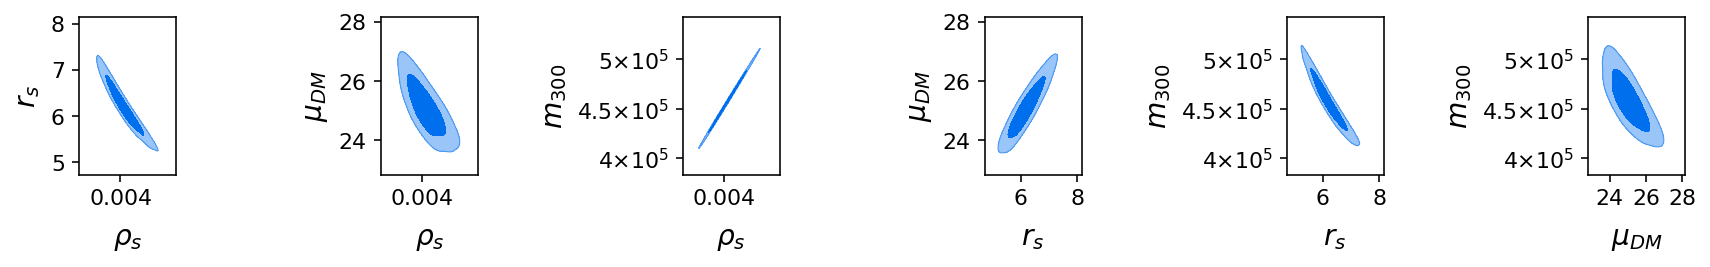

In [8]:
# Multiple 2D subplots
g = plots.get_subplot_plotter(subplot_size=2.0)
g.settings.scaling = False # prevent scaling down font sizes even though small subplots

# Plot and save to a file:
g.plots_2d(samples, param_pairs=[['p1', 'p2'], ['p1', 'p3'],['p1', 'p4'], ['p2', 'p3'], ['p2', 'p4'], ['p3', 'p4']], 
           nx=6, filled=True);
g.export(confidenceL)


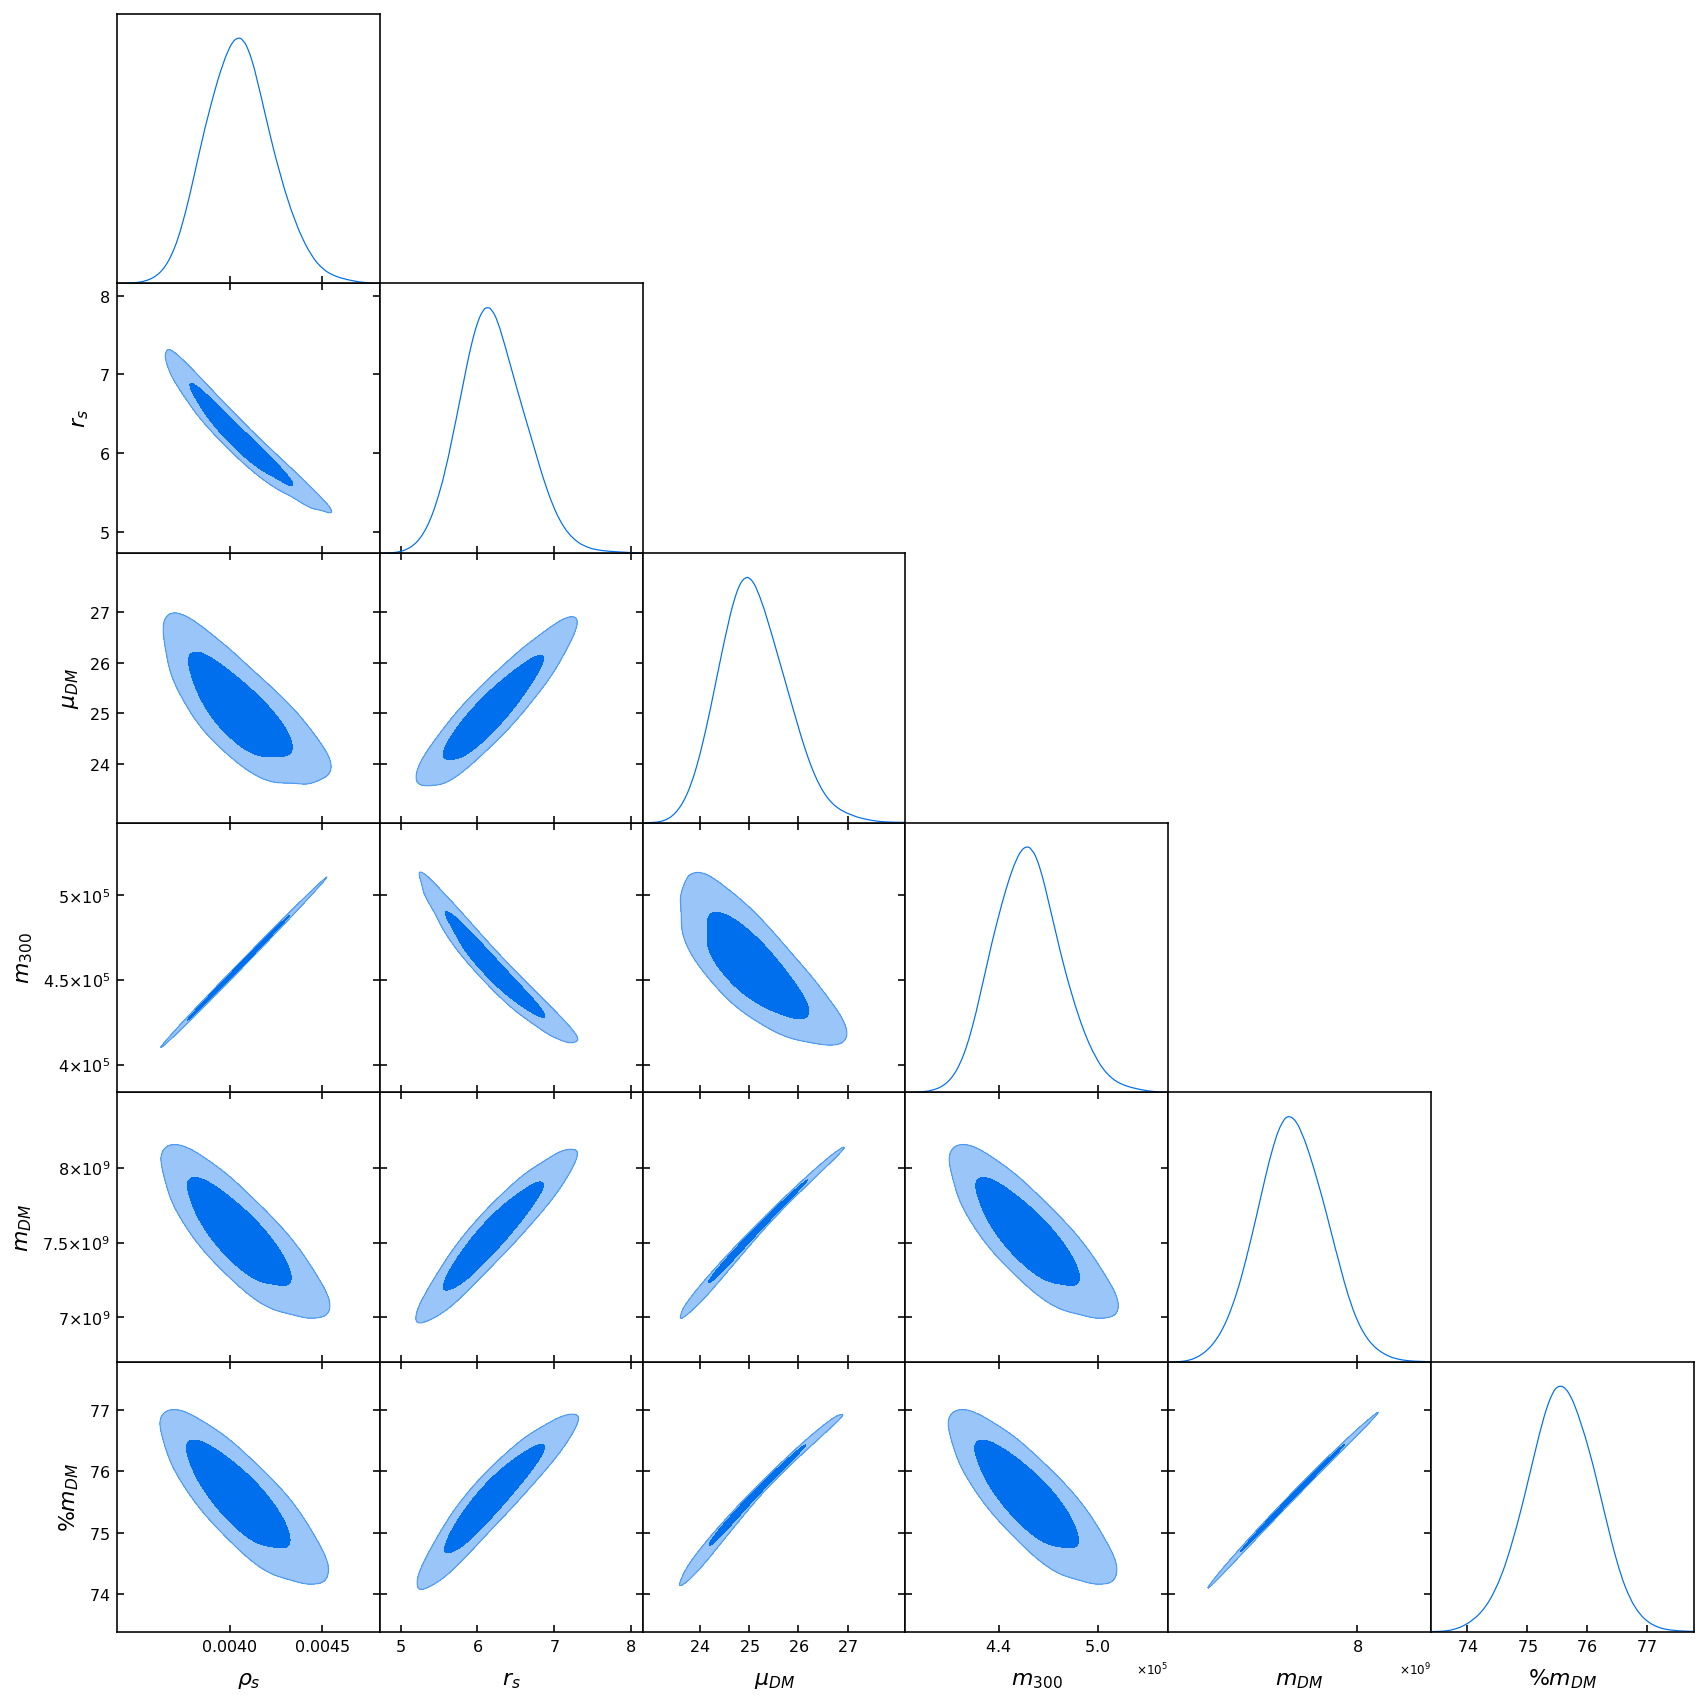

In [12]:
# Triangle plot
g = plots.get_subplot_plotter()
g.triangle_plot([samples], filled=True)

In [9]:
# LaTeX format of parameters:
#
print(samples.getInlineLatex('p1',limit=1))

print(samples.getInlineLatex('p2',limit=1))

print(samples.getInlineLatex('p3',limit=1))

print(samples.getInlineLatex('p4',limit=2))

print(samples.getInlineLatex('p5',limit=1))

print(samples.getInlineLatex('p6',limit=1))


\rho_s = 0.00405^{+0.00017}_{-0.00020}
r_s = 6.21^{+0.39}_{-0.46}
\mu_{DM} = 25.09^{+0.61}_{-0.75}
m_{300} = \left(\,4.58^{+0.43}_{-0.38}\,\right)\cdot 10^{5}
m_{DM} = \left(\,7.55\pm 0.24\,\right)\cdot 10^{9}
\% m_{DM} = 75.57\pm 0.58


In [10]:
# Principal component analysis results:
print(samples.PCA(['p1','p2','p3','p4','p5','p6']))

PCA for parameters:
         1 :ln(\rho_s)
         2 :ln(r_s)
         3 :ln(\mu_{DM})
         4 :ln(m_{300})
         5 :ln(m_{DM})
         6 :ln(\% m_{DM})

Correlation matrix for reduced parameters
          p1 :  1.0000 -0.9674 -0.7749  1.0000 -0.8153 -0.8154
          p2 : -0.9674  1.0000  0.9098 -0.9671  0.9340  0.9335
          p3 : -0.7749  0.9098  1.0000 -0.7743  0.9943  0.9928
          p4 :  1.0000 -0.9671 -0.7743  1.0000 -0.8147 -0.8148
          p5 : -0.8153  0.9340  0.9943 -0.8147  1.0000  0.9999
          p6 : -0.8154  0.9335  0.9928 -0.8148  0.9999  1.0000

e-values of correlation matrix
PC 1:   0.0000
PC 2:   0.0000
PC 3:   0.0000
PC 4:   0.0064
PC 5:   0.4882
PC 6:   5.5054

e-vectors
  1: -0.5205  0.5548  0.0073 -0.0411 -0.5109  0.3981
  2: -0.7926 -0.3147  0.0341 -0.2601  0.1570 -0.4235
  3:  0.3178  0.1239  0.0969 -0.7160 -0.4452 -0.4043
  4:  0.0000 -0.7601  0.0037 -0.0372 -0.5123  0.3979
  5: -0.0000  0.0035 -0.7604  0.3525 -0.3568 -0.4126
  6: -0.0000  0.0003

In [11]:
# Covariance matrix:
print(samples.cov())

[[ 3.37076525e-08 -7.56316343e-05 -9.82861358e-05  3.79079124e+00
  -3.56217247e+04 -8.72107454e-05]
 [-7.56316343e-05  1.83808594e-01  2.71891351e-01 -8.50361395e+03
   9.54394268e+07  2.32786630e-01]
 [-9.82861358e-05  2.71891351e-01  4.82981366e-01 -1.10445208e+04
   1.64873553e+08  4.01771127e-01]
 [ 3.79079124e+00 -8.50361395e+03 -1.10445208e+04  4.26316160e+08
  -4.00309323e+12 -9.80043254e+03]
 [-3.56217247e+04  9.54394268e+07  1.64873553e+08 -4.00309323e+12
   5.68961994e+16  1.38998833e+08]
 [-8.72107454e-05  2.32786630e-01  4.01771127e-01 -9.80043254e+03
   1.38998833e+08  3.39959576e-01]]
